### 整数规划原问题求解

In [1]:
import gurobipy as gp
from gurobipy import GRB

# 创建模型
model = gp.Model("Integer_Programming")

# 创建决策变量
x1 = model.addVar(vtype=GRB.INTEGER, name="x1")
x2 = model.addVar(vtype=GRB.INTEGER, name="x2")

# 设置目标函数
model.setObjective(100 * x1 + 150 * x2, sense=GRB.MAXIMIZE)

# 添加约束条件
model.addConstr(2 * x1 + x2 <= 10, "c1")
model.addConstr(3 * x1 + 6 * x2 <= 40, "c2")

# 求解模型
model.optimize()

# 打印最优解
if model.status == GRB.OPTIMAL:
    print(f"Optimal Objective Value: {model.objVal}")
    print(f"x1 = {x1.x}")
    print(f"x2 = {x2.x}")


Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: AMD Ryzen 7 7735H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 2 rows, 2 columns and 4 nonzeros
Model fingerprint: 0x60e99bf1
Variable types: 0 continuous, 2 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+00]
  Objective range  [1e+02, 2e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+01, 4e+01]
Found heuristic solution: objective 500.0000000
Presolve time: 0.01s
Presolved: 2 rows, 2 columns, 4 nonzeros
Variable types: 0 continuous, 2 integer (0 binary)
Found heuristic solution: objective 550.0000000

Root relaxation: objective 1.033333e+03, 2 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 1033.33333    0    2  5

### 可行域

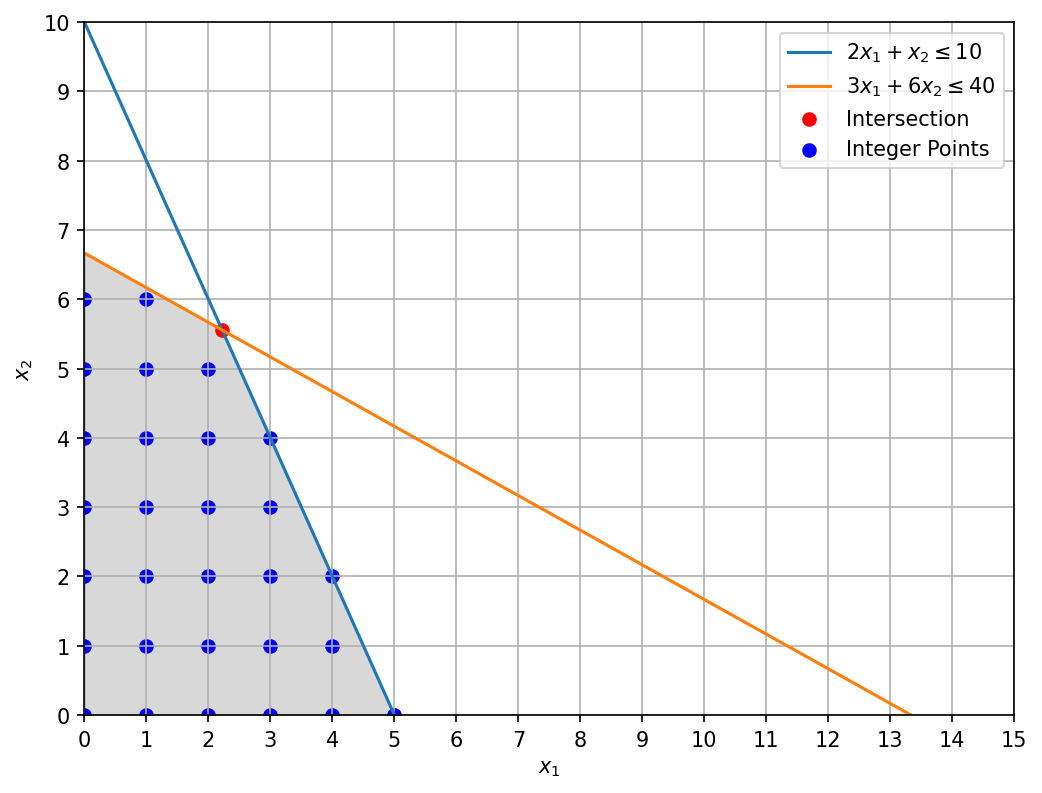

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 定义约束条件中的不等式
x = np.linspace(0, 20, 400)
y1 = 10 - 2 * x
y2 = (40 - 3 * x) / 6

# 绘制不等式
plt.figure(figsize=(8, 6), dpi=150)

plt.plot(x, y1, label=r'$2x_1 + x_2 \leq 10$')
plt.plot(x, y2, label=r'$3x_1 + 6x_2 \leq 40$')

# 添加 x, y 轴标签
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

# 设置 x, y 轴范围
plt.xlim((0, 15))
plt.ylim((0, 10))

# 填充可行域 - x2 <= 5
plt.fill_between(x, 0, y1, where=(y1*y2 >= 0) & (x <= 5), color='gray', alpha=0.3)


plt.fill_between(x,y1,y2, where=(y1 >= 0) & (y2 >= 0) & (x <= 5), color='white')
# 填充可行域 - x2 >= 6
# plt.fill_between(x, 0, y2, where=(y1 >= 0) & (x >= 6), color='gray', alpha=0.3)

# 计算交点
x_intersect = np.array([5, 2.2222])  # 交点 x_1 的值
y_intersect = np.array([0, 5.55555])  # 交点 x_2 的值

# 在图上标注交点
plt.scatter(x_intersect, y_intersect, color='red', marker='o', label='Intersection')

# 找到可行域内的整数点并标注
integer_points = [(x_int, y_int) for x_int in range(0, 6) for y_int in range(0, 11) if (2 * x_int + y_int <= 10 and 3 * x_int + 6 * y_int <= 40)]
x_integers, y_integers = zip(*integer_points)

# 在可行域内的整数点上做标注
plt.scatter(x_integers, y_integers, color='blue', marker='o', label='Integer Points')

# 添加图例
plt.legend()

# 设置坐标轴刻度基本单位为 1
plt.xticks(np.arange(0, 16, 1))
plt.yticks(np.arange(0, 11, 1))

# 显示网格
plt.grid(True)

# 显示图形
plt.show()


### 线性规划松弛原问题求解


In [3]:
import gurobipy as gp
from gurobipy import GRB

# 创建模型
model = gp.Model("Integer_Programming")

# 创建决策变量
x1 = model.addVar(vtype=GRB.CONTINUOUS,lb = 0, name="x1")
x2 = model.addVar(vtype=GRB.CONTINUOUS,lb = 0, name="x2")

# 设置目标函数
model.setObjective(100 * x1 + 150 * x2, sense=GRB.MAXIMIZE)

# 添加约束条件
model.addConstr(2 * x1 + x2 <= 10, "c1")
model.addConstr(3 * x1 + 6 * x2 <= 40, "c2")

# 求解模型
model.optimize()

# 打印最优解
if model.status == GRB.OPTIMAL:
    print(f"Optimal Objective Value: {model.objVal}")
    print(f"x1 = {round(x1.x,3)}")
    print(f"x2 = {round(x2.x,3)}")

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: AMD Ryzen 7 7735H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 2 rows, 2 columns and 4 nonzeros
Model fingerprint: 0x60e6e1b1
Coefficient statistics:
  Matrix range     [1e+00, 6e+00]
  Objective range  [1e+02, 2e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+01, 4e+01]
Presolve time: 0.01s
Presolved: 2 rows, 2 columns, 4 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5000000e+32   2.625000e+30   2.500000e+02      0s
       2    1.0555556e+03   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.055555556e+03
Optimal Objective Value: 1055.5555555555554
x1 = 2.222
x2 = 5.556


### 子问题2求解

In [4]:
import gurobipy as gp
from gurobipy import GRB

# 创建模型
model = gp.Model("Integer_Programming")

# 创建决策变量
x1 = model.addVar(vtype=GRB.CONTINUOUS,lb = 0, name="x1")
x2 = model.addVar(vtype=GRB.CONTINUOUS,lb = 0, name="x2")

# 设置目标函数
model.setObjective(100 * x1 + 150 * x2, sense=GRB.MAXIMIZE)

# 添加约束条件
model.addConstr(2 * x1 + x2 <= 10, "c1")
model.addConstr(3 * x1 + 6 * x2 <= 40, "c2")
model.addConstr(x2 <= 5, "sub1")
# 求解模型
model.optimize()

# 打印最优解
if model.status == GRB.OPTIMAL:
    print(f"Optimal Objective Value: {model.objVal}")
    print(f"x1 = {round(x1.x,3)}")
    print(f"x2 = {round(x2.x,3)}")

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: AMD Ryzen 7 7735H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 3 rows, 2 columns and 5 nonzeros
Model fingerprint: 0x52ee61a7
Coefficient statistics:
  Matrix range     [1e+00, 6e+00]
  Objective range  [1e+02, 2e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+00, 4e+01]
Presolve removed 1 rows and 0 columns
Presolve time: 0.01s
Presolved: 2 rows, 2 columns, 4 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.5000000e+03   7.500000e+00   0.000000e+00      0s
       1    1.0000000e+03   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.02 seconds (0.00 work units)
Optimal objective  1.000000000e+03
Optimal Objective Value: 1000.0
x1 = 2.5
x2 = 5.0


### 子问题3求解

In [5]:
import gurobipy as gp
from gurobipy import GRB

# 创建模型
model = gp.Model("Integer_Programming")

# 创建决策变量
x1 = model.addVar(vtype=GRB.CONTINUOUS,lb = 0, name="x1")
x2 = model.addVar(vtype=GRB.CONTINUOUS,lb = 0, name="x2")

# 设置目标函数
model.setObjective(100 * x1 + 150 * x2, sense=GRB.MAXIMIZE)

# 添加约束条件
model.addConstr(2 * x1 + x2 <= 10, "c1")
model.addConstr(3 * x1 + 6 * x2 <= 40, "c2")
model.addConstr(x2 >= 6, "sub1")
# 求解模型
model.optimize()

# 打印最优解
if model.status == GRB.OPTIMAL:
    print(f"Optimal Objective Value: {model.objVal}")
    print(f"x1 = {round(x1.x,3)}")
    print(f"x2 = {round(x2.x,3)}")

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: AMD Ryzen 7 7735H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 3 rows, 2 columns and 5 nonzeros
Model fingerprint: 0x55dc3b05
Coefficient statistics:
  Matrix range     [1e+00, 6e+00]
  Objective range  [1e+02, 2e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e+00, 4e+01]
Presolve removed 3 rows and 2 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0333333e+03   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.033333333e+03
Optimal Objective Value: 1033.3333333333333
x1 = 1.333
x2 = 6.0


### 子问题2、子问题3可行域

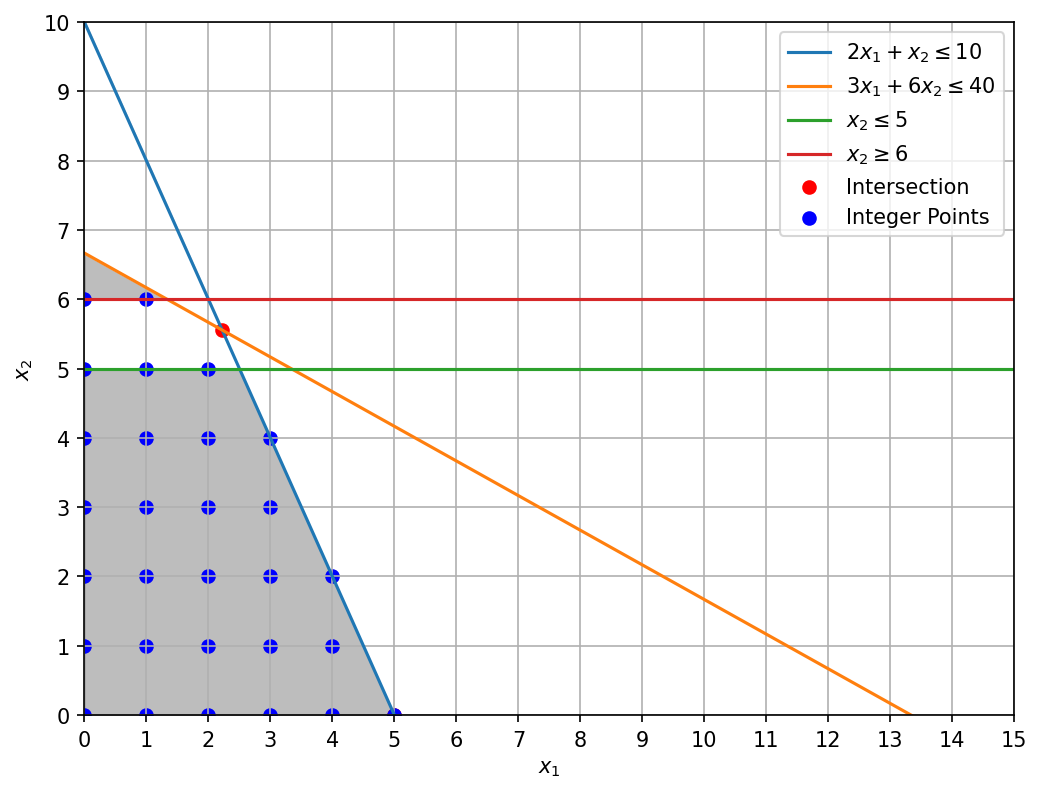

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 定义约束条件中的不等式
x = np.linspace(0, 20, 400)
y1 = 10 - 2 * x
y2 = (40 - 3 * x) / 6
y3 = 5 - 0*x
y4 = 6- 0*x
# 绘制不等式
plt.figure(figsize=(8, 6), dpi=150)

plt.plot(x, y1, label=r'$2x_1 + x_2 \leq 10$')
plt.plot(x, y2, label=r'$3x_1 + 6x_2 \leq 40$')
plt.plot(x, y3, label=r'$x_2 \leq 5$')
plt.plot(x, y4, label=r'$x_2 \geq 6$')
# 添加 x, y 轴标签
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

# 设置 x, y 轴范围
plt.xlim((0, 15))
plt.ylim((0, 10))

# 填充可行域 - x2 <= 5
plt.fill_between(x, 0, y1, where=(y1*y2 >= 0) & (x <= 5), color='gray', alpha=0.3)
plt.fill_between(x, 0, y3, where=(y1*y2 >= 0) & (x <= 5), color='gray', alpha=0.3)
plt.fill_between(x, y4, y1, where=(y1*y2 >= 0) & (x <= 5), color='gray', alpha=0.3)


plt.fill_between(x,y1,y2, where=(y1 >= 0) & (y2 >= 0) & (x <= 5), color='white')
plt.fill_between(x,y2,y3, where=(x>=3), color='white')
plt.fill_between(x,5,6, color='white')


# 填充可行域 - x2 >= 6
# plt.fill_between(x, 0, y2, where=(y1 >= 0) & (x >= 6), color='gray', alpha=0.3)

# 计算交点
x_intersect = np.array([5, 2.2222])  # 交点 x_1 的值
y_intersect = np.array([0, 5.55555])  # 交点 x_2 的值

# 在图上标注交点
plt.scatter(x_intersect, y_intersect, color='red', marker='o', label='Intersection')

# 找到可行域内的整数点并标注
integer_points = [(x_int, y_int) for x_int in range(0, 6) for y_int in range(0, 11) if (2 * x_int + y_int <= 10 and 3 * x_int + 6 * y_int <= 40)]
x_integers, y_integers = zip(*integer_points)

# 在可行域内的整数点上做标注
plt.scatter(x_integers, y_integers, color='blue', marker='o', label='Integer Points')

# 添加图例
plt.legend()

# 设置坐标轴刻度基本单位为 1
plt.xticks(np.arange(0, 16, 1))
plt.yticks(np.arange(0, 11, 1))

# 显示网格
plt.grid(True)

# 显示图形
plt.show()


### 子问题4求解

In [7]:
import gurobipy as gp
from gurobipy import GRB

# 创建模型
model = gp.Model("Integer_Programming")

# 创建决策变量
x1 = model.addVar(vtype=GRB.CONTINUOUS,lb = 0, name="x1")
x2 = model.addVar(vtype=GRB.CONTINUOUS,lb = 0, name="x2")

# 设置目标函数
model.setObjective(100 * x1 + 150 * x2, sense=GRB.MAXIMIZE)

# 添加约束条件
model.addConstr(2 * x1 + x2 <= 10, "c1")
model.addConstr(3 * x1 + 6 * x2 <= 40, "c2")
model.addConstr(x2 >= 6, "sub1")
model.addConstr(x1 <= 1, "sub4")
# 求解模型
model.optimize()

# 打印最优解
if model.status == GRB.OPTIMAL:
    print(f"Optimal Objective Value: {model.objVal}")
    print(f"x1 = {round(x1.x,3)}")
    print(f"x2 = {round(x2.x,3)}")

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: AMD Ryzen 7 7735H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 4 rows, 2 columns and 6 nonzeros
Model fingerprint: 0x96d57e18
Coefficient statistics:
  Matrix range     [1e+00, 6e+00]
  Objective range  [1e+02, 2e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 4e+01]
Presolve removed 4 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0250000e+03   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.025000000e+03
Optimal Objective Value: 1025.0
x1 = 1.0
x2 = 6.167


### 子问题5求解

In [8]:
import gurobipy as gp
from gurobipy import GRB

# 创建模型
model = gp.Model("Integer_Programming")

# 创建决策变量
x1 = model.addVar(vtype=GRB.CONTINUOUS,lb = 0, name="x1")
x2 = model.addVar(vtype=GRB.CONTINUOUS,lb = 0, name="x2")

# 设置目标函数
model.setObjective(100 * x1 + 150 * x2, sense=GRB.MAXIMIZE)

# 添加约束条件
model.addConstr(2 * x1 + x2 <= 10, "c1")
model.addConstr(3 * x1 + 6 * x2 <= 40, "c2")
model.addConstr(x2 >= 6, "sub1")
model.addConstr(x1 >= 2, "sub5")
# 求解模型
model.optimize()

# 打印最优解
if model.status == GRB.OPTIMAL:
    print(f"Optimal Objective Value: {model.objVal}")
    print(f"x1 = {round(x1.x,3)}")
    print(f"x2 = {round(x2.x,3)}")

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: AMD Ryzen 7 7735H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 4 rows, 2 columns and 6 nonzeros
Model fingerprint: 0x1e22da5f
Coefficient statistics:
  Matrix range     [1e+00, 6e+00]
  Objective range  [1e+02, 2e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 4e+01]
Presolve removed 3 rows and 2 columns
Presolve time: 0.01s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Infeasible or unbounded model


### 子问题6求解

In [9]:
import gurobipy as gp
from gurobipy import GRB

# 创建模型
model = gp.Model("Integer_Programming")

# 创建决策变量
x1 = model.addVar(vtype=GRB.CONTINUOUS,lb = 0, name="x1")
x2 = model.addVar(vtype=GRB.CONTINUOUS,lb = 0, name="x2")

# 设置目标函数
model.setObjective(100 * x1 + 150 * x2, sense=GRB.MAXIMIZE)

# 添加约束条件
model.addConstr(2 * x1 + x2 <= 10, "c1")
model.addConstr(3 * x1 + 6 * x2 <= 40, "c2")
model.addConstr(x2 >= 6, "sub1")
model.addConstr(x1 <= 1, "sub4")
model.addConstr(x2 <= 6, "sub6")
# 求解模型
model.optimize()

# 打印最优解
if model.status == GRB.OPTIMAL:
    print(f"Optimal Objective Value: {model.objVal}")
    print(f"x1 = {round(x1.x,3)}")
    print(f"x2 = {round(x2.x,3)}")

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: AMD Ryzen 7 7735H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 5 rows, 2 columns and 7 nonzeros
Model fingerprint: 0xeec3bfb0
Coefficient statistics:
  Matrix range     [1e+00, 6e+00]
  Objective range  [1e+02, 2e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 4e+01]
Presolve removed 5 rows and 2 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0000000e+03   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.000000000e+03
Optimal Objective Value: 1000.0
x1 = 1.0
x2 = 6.0


### 子问题7求解

In [10]:
import gurobipy as gp
from gurobipy import GRB

# 创建模型
model = gp.Model("Integer_Programming")

# 创建决策变量
x1 = model.addVar(vtype=GRB.CONTINUOUS,lb = 0, name="x1")
x2 = model.addVar(vtype=GRB.CONTINUOUS,lb = 0, name="x2")

# 设置目标函数
model.setObjective(100 * x1 + 150 * x2, sense=GRB.MAXIMIZE)

# 添加约束条件
model.addConstr(2 * x1 + x2 <= 10, "c1")
model.addConstr(3 * x1 + 6 * x2 <= 40, "c2")
model.addConstr(x2 >= 6, "sub1")
model.addConstr(x1 <= 1, "sub4")
model.addConstr(x2 >= 7, "sub7")
# 求解模型
model.optimize()

# 打印最优解
if model.status == GRB.OPTIMAL:
    print(f"Optimal Objective Value: {model.objVal}")
    print(f"x1 = {round(x1.x,3)}")
    print(f"x2 = {round(x2.x,3)}")

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: AMD Ryzen 7 7735H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 5 rows, 2 columns and 7 nonzeros
Model fingerprint: 0x24f11351
Coefficient statistics:
  Matrix range     [1e+00, 6e+00]
  Objective range  [1e+02, 2e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 4e+01]
Presolve removed 3 rows and 0 columns
Presolve time: 0.01s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Infeasible or unbounded model
